# Parcial I - Métodos Computacionales

**2025-1**

---

Nombre: Ana Sofia Del Rio

Identificación: 1092851949

---

* ⚠ Explique su código usando con comentarios,

* ❗Todas las funciones deben tener documentación básica,

* 🛑 El uso de IA's no está permitido,

* ⚛ La interpretación del enunciado hace parte de la evaluación,

* ⏲ Este parcial tiene una duración de 2 horas

In [2]:
# Librerias útiles
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from math import factorial
from scipy.optimize import root_scalar, newton, bisect # Funciones para raices

## Ayudas
# np.sign (Signo de una variable)
# np.deg2rad (Convertir grados a radianes)
# pd.DataFrame Genera un dataframe a partir de un diccionario o listas
# range(0, 10, 2) (Pasos de 2 comenzando en 0 hasta 10)

# 1

**(40 puntos)** El **método de Ridder** es un algoritmo de búsqueda de raíces que, como la bisección, requiere un intervalo $[a, b]$ tal que $f(a) \cdot f(b) < 0$. A diferencia de la bisección, Ridder introduce una corrección exponencial para acelerar la convergencia, logrando **convergencia cuadrática** sin requerir derivadas.

---
### Pasos para implementar

1. **Definir la función** $f(x)$ y un intervalo $[a, b]$ tal que:

   - $f(a) \cdot f(b) < 0$ (la función tiene signos opuestos en los extremos del intervalo).
   - La función debe ser continua en $[a, b]$.

2. **Calcular el punto medio**:

   $$
   m = \frac{a + b}{2}
   $$

3. **Calcular la corrección exponencial**:

   - Evaluar $f(a)$, $f(b)$ y $f(m)$.
   - Calcular:

     $$
     s = \sqrt{f(m)^2 - f(a) f(b)}
     $$

   - Si $s = 0$, detener: la raíz no puede estimarse en esta iteración.

   - Calcular el nuevo candidato a raíz:

     $$
     x = m + \frac{(m - a) f(m)}{s} \cdot \text{sign}(f(a) - f(b))
     $$

4. **Evaluar $f(x)$** y actualizar el intervalo:

   - Si $f(m) \cdot f(x) < 0$, entonces la nueva raíz está entre $m$ y $x$.
   - Si $f(a) \cdot f(x) < 0$, entonces actualizar $b = x$, luego $f(b) = f(x)$.
   - Si $f(b) \cdot f(x) < 0$, entonces actualizar $a = x$, luego $f(a) = f(x)$.
   - En cada paso mantener la condición $f(a) \cdot f(b) < 0$.

5. **Criterio de parada**:

   - Repetir los pasos anteriores hasta que se alcance la tolerancia deseada:

     $$
     |f(x)| < \varepsilon \quad \text{o} \quad |b - a| < \delta
     $$

   donde $\varepsilon$ y $\delta$ son tolerancias establecidas por el usuario.

---

* Defina una función llamada `Ridder` que calcule la raiz de una función dada. Su función debe tener documentación y retornar el valor de la raiz junto con el número de iteraciones empleadas para alcanzar la convergencia dada una tolerancia.

* Usando
$$\cos(x) = x,$$

Grafique la función para $0\leq x \leq \pi/2$ usando 100 puntos. Luego, cree un DataFrame con los datos de $x$ y $f(x)$, y encuentre una primera aproximación a la raiz aplicando un filtro en el dataframe con los valores más cercanos a cero.

* Usando el método de Ridder encuentre la raiz númericamente y compare su resultado usando el método de bisección y secante.

* Para las siguientes tolerancias (ver código) realice un gráfico usando escala logaritimica en $y$ de cuantas iteraciones son necesarias hasta alcanzar la convergencia. ¿Qué puede concluir acerca de la misma?

```python
# Tolerancias
tol = np.logspace(-1, -20, 20)

# Grafico semilog

plt.semilogy(N, tol)

```

In [3]:
def Ridder(f,a,b, tol=1e-6, maxiter=100):
  '''
    Función para encontrar raíces de una función haciendo uso del Método de Ridder
    Parámetros:
    f: la función a la que le vamos a calcular las raíces
    a,b: límites de los intervalos
    tol: tolerancia previamente establecida
    maxiter: máximo de iteraciones que va a realizar la función
    '''
  n=0
  terminos=[]
  if f(a)*f(b)>0: #Paso 1
      raise ValueError('f(a)*f(b) debe ser menor que 0')
  while n < maxiter:

    m= (a+b)/2 #Calculamos el punto medio
    f_a= f(a) #Evaluamos f(a), f(b) y f(m)
    f_b= f(b)
    f_m= f(m)
    s= np.sqrt((f_m**2)-(f_a*f_b))

    if s==0:
      raise ValueError('la raíz no puede estimarse en esta iteración')
    else:
      x= m + (((m-a)*f_m)/s)*np.sign(f_a - f_b) #Calculamos el candidato a ser raíz
      f_x= f(x)

    if (f_m*f_x)<0: #Evaluamos y actualizamos las variables
      a=m
      b=x
    elif (f_a*f_x)<0:
      b=x
    else:
      a=x
    terminos.append(x)
    n+=1
    if abs(f_x) < tol: #Criterio de Parada
      return (x,n)
  raise ValueError('No se alcanzó la tolerancia en el valor máximo de iteraciones')

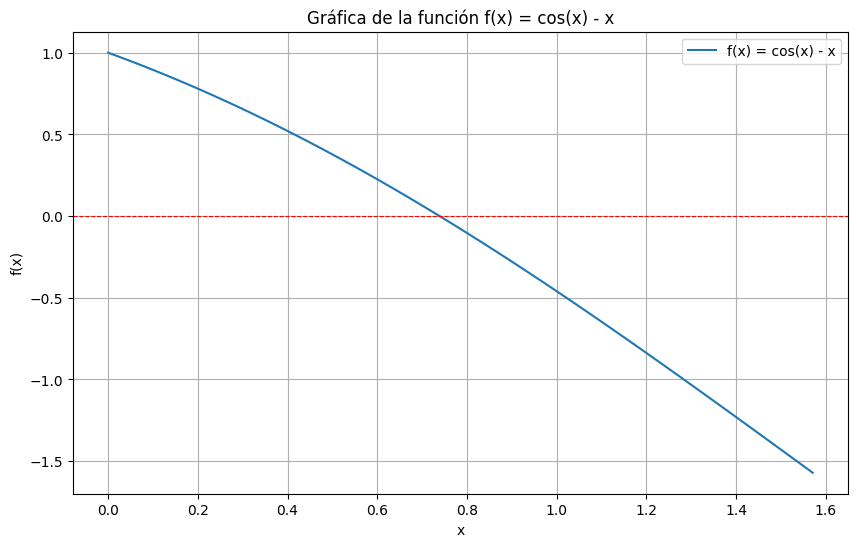

In [4]:
#Definimos una funcion para cos(x)
def f(x):
  return np.cos(x) - x

x= np.linspace(0, np.pi / 2, 100) # Graficamos en el intervalo dado

plt.figure(figsize=(10, 6))
plt.plot(x, f(x), label='f(x) = cos(x) - x')
plt.axhline(0, color='red', linewidth=0.8,linestyle='--')
plt.title('Gráfica de la función f(x) = cos(x) - x')
plt.xlabel('x')
plt.ylabel('f(x)')
plt.grid(True)
plt.legend()
plt.show()

In [5]:
#Hacemos un DataFrame con los valores de x y f(x)
df = pd.DataFrame({'x': x, 'f(x)': f(x)})
print(df[(df['f(x)']<0.1)&(df['f(x)']>-0.1)])# Filtrar valores cercanos a cero para encontrar una aproximación de la raíz



           x      f(x)
43  0.682265  0.093881
44  0.698132  0.067913
45  0.713998  0.041751
46  0.729865  0.015399
47  0.745732 -0.011140
48  0.761598 -0.037864
49  0.777465 -0.064771
50  0.793331 -0.091857


In [7]:
#Utilizamos el método de Ridder para encontrar la raíz
raiz_Ridder= Ridder(f, 0, np.pi/2)
print(f'La raíz con el método de Ridder es:{raiz_Ridder}')

#Utilizamos el método de la bisección para encontrar la raíz
raiz_biseccion= bisect(f,0, np.pi/2)
print(f'La raíz con el método de bisección es:{raiz_biseccion}')

#Utilizamos el método de la secante para encontrar la raíz
raiz_secante = newton(f, x0=0, x1=np.pi/2)
print(f'La raíz con el método de la secante es:{raiz_secante}')

#podemos ver que el método más preciso el método de Ridder

La raíz con el método de Ridder es:(np.float64(0.7390848878903102), 2)
La raíz con el método de bisección es:0.7390851332152737
La raíz con el método de la secante es:0.7390851332151607


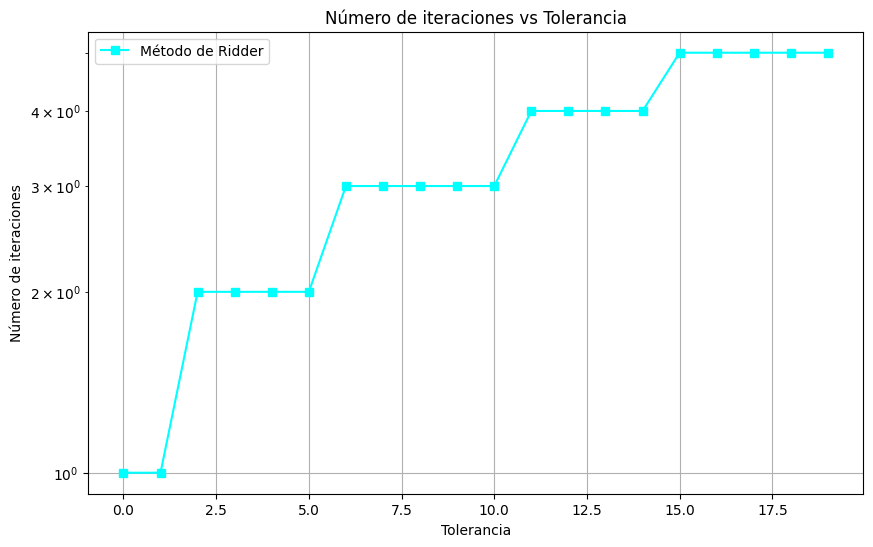

In [ ]:
# Tolerancias
tol = np.logspace(-1, -20, 20)

#Lista para guardar las iteraciones
ridder_i=[]
biseccion_i=[]
secante_i=[]

#Calculamos el número de iteraciones para cada tolerancia
for t in tol:
  raiz_Ridder, i= Ridder(f, 0, np.pi/2, tol=t)
  ridder_i.append(i)

#Graficamos usando escala logaritimica en y
plt.figure(figsize=(10, 6))
plt.semilogy(ridder_i,color='cyan',marker='s', label='Método de Ridder')
plt.xlabel('Tolerancia')
plt.ylabel('Número de iteraciones')
plt.title('Número de iteraciones vs Tolerancia')
plt.grid(True)
plt.legend()
plt.show()

#Podemos ver que a menor tolerancia mas iteraciones son necesarias, lo cual tiene sentido, pues entre más pequeña esa tolerancia, más precisa y más iteraciones serán necesarias para cumplir con esta precisión
#Además también vemos quees un método muy eficiente pues converge en pocas iteraciones incluso para tolerancias pequeñas

#2

**(60 puntos)** En óptica, cuando un rayo de luz atraviesa la interfaz entre dos medios con diferentes índices de refracción, su dirección cambia según la ley de Snell. Para el caso de un prisma triangular, cuando un rayo emerge después de dos refracciones, el ángulo de desviación total $\delta$ está dado por:

$$\delta(\theta_i) = \theta_i + \arcsin\left(n\sin\left(A - \arcsin\left(\frac{\sin\theta_i}{n}\right)\right)\right) - A$$

donde $\theta_i$ es el ángulo de incidencia, $n$ es el índice de refracción del prisma y $A$ es el ángulo del prisma.

La derivada de esta función con respecto al ángulo de incidencia $\theta_i$ es:

$$\frac{d\delta}{d\theta_i} = 1 - \frac{\cos\theta_i \cdot \cos(A-\theta_r)}{\cos\theta_r \cdot \sqrt{1-n^2\sin^2(A-\theta_r)}}$$

donde $\theta_r = \arcsin\left(\frac{\sin\theta_i}{n}\right)$ es el ángulo de refracción en la primera interfaz.

Considere un prisma de vidrio crown con $n = 1.52$ y $A = 60°$.

### Parte A:
* Escriba una función explicita y documentada para $\frac{d\delta}{d\theta_i}$

* Realice un gráfico para $\frac{d\delta}{d\theta_i}$ y encuentre el ángulo de incidencia $\theta_i$ que produce el ángulo de desviación mínimo para $\theta_i \in [30°, 80°]$.

* Use el método de Newton-Raphson (sin derivada) y el método de la secante para hallar el ángulo de desviación mínimo.


### Parte B:
* Determine el ángulo crítico $\theta_c$ para el cual el rayo comienza a experimentar reflexión interna total en la segunda interfaz del prisma. Esta condición ocurre cuando:

$$\sin(A - \theta_r) = \frac{1}{n}$$

* Resuelva numéricamente la ecuación anterior para encontrar el ángulo de incidencia $\theta_i$ correspondiente a este ángulo crítico, utilizando el método de la bisección.





El ángulo de desviación mínimo usando el método de newton-Raphson es:0.8633131150155536 rad
El ángulo de desviación mínimo usando el método de la secante es:0.8633131150155536 rad


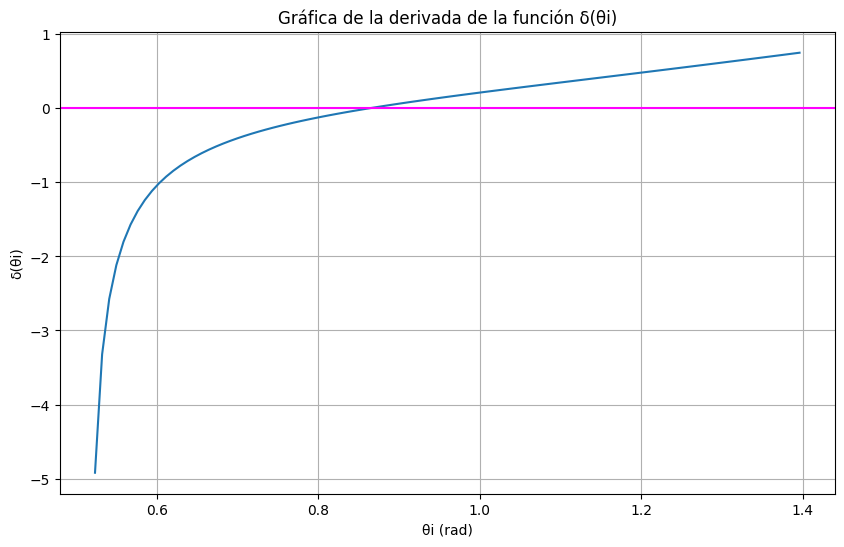

In [ ]:
#A
def derivada(theta_i, A_grados=60, n=1.52):
  ''' Calcula la derivada de la función δ(θi) para un prisma triangular
  Parámetros
  theta_i: ángulo de incidencia
  A_grados: ángulo del prisma(en grados)
  n: índice de refracción del prisma
  Retorna: dδ/dθi

   '''
  A= np.deg2rad(A_grados)
  theta_r= np.arcsin(np.sin(theta_i)/n)
  return 1-((np.cos(theta_i)*np.cos(A-theta_r))/(np.cos(theta_r)*(np.sqrt(1-(n**2)*(np.sin(A-theta_r))**2))))

#Grafico para la derivada
theta=np.linspace(np.deg2rad(30), np.deg2rad(80), 100)
fprime= derivada(theta)
plt.figure(figsize=(10, 6))
plt.plot(theta, fprime)
plt.title('Gráfica de la derivada de la función δ(θi)')
plt.xlabel('θi (rad)')
plt.ylabel('δ(θi)')
plt.axhline(0, color='magenta')
plt.grid()
plt.plot()

#Ángulo de desviación mínimo
newtonr=newton(derivada, x0=0.9)
print(f'El ángulo de desviación mínimo usando el método de newton-Raphson es:{newtonr} rad')
secante=newton(derivada, x0=0.8, x1=1)
print(f'El ángulo de desviación mínimo usando el método de la secante es:{secante} rad')




In [ ]:
#B
def f_critico(theta_i, A_grados=60, n=1.52):
    '''
    Retorna el valor de la función:
    sin(A - arcsin(sin(theta_i)/n)) - 1/n resuelta numéricamente para encontrar el ángulo crítico
    Parámetros:
    theta_i: ángulo de incidencia
    A: ángulo del prisma(grados)
    n: índice de refracción del prisma
    que se hace cero cuando ocurre reflexión total.
    '''
    A= np.deg2rad(A_grados)
    theta_r = np.arcsin(np.sin(theta_i) / n)
    return np.sin(A - theta_r) - 1/n

#Encontramos el ángulo crítico θc usando el método de la bisección
bisec=bisect(f_critico,np.deg2rad(20), np.deg2rad(70)) # cambiamos el intervalo para que tengan signos opuestos y se pueda usar el metodo de la biscción
print(f'El ángulo crítico θc es:{bisec} rad')



El ángulo crítico θc es:0.5136536662198127 rad
